<a href="https://colab.research.google.com/github/sinugowde/DLCVNLP/blob/master/vanila_GAN_Implementation_in_pytorch_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(111)

In [ ]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] =2 * 3.14*torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

In [ ]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))

In [ ]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] =torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])

In [ ]:
train_data

tensor([[0.0577, 0.0577],
        [0.3815, 0.3723],
        [0.9831, 0.8322],
        ...,
        [0.1796, 0.1786],
        [0.3793, 0.3702],
        [0.1904, 0.1893]])

In [ ]:
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]
train_set

[(tensor([0.0577, 0.0577]), tensor(0.)),
 (tensor([0.3815, 0.3723]), tensor(0.)),
 (tensor([0.9831, 0.8322]), tensor(0.)),
 (tensor([0.9627, 0.8207]), tensor(0.)),
 (tensor([0.1361, 0.1357]), tensor(0.)),
 (tensor([0.5746, 0.5435]), tensor(0.)),
 (tensor([0.7617, 0.6902]), tensor(0.)),
 (tensor([0.3552, 0.3478]), tensor(0.)),
 (tensor([0.1390, 0.1386]), tensor(0.)),
 (tensor([0.6467, 0.6025]), tensor(0.)),
 (tensor([0.0655, 0.0654]), tensor(0.)),
 (tensor([0.7340, 0.6698]), tensor(0.)),
 (tensor([0.2670, 0.2638]), tensor(0.)),
 (tensor([0.8683, 0.7632]), tensor(0.)),
 (tensor([0.1232, 0.1229]), tensor(0.)),
 (tensor([0.6271, 0.5868]), tensor(0.)),
 (tensor([0.2872, 0.2832]), tensor(0.)),
 (tensor([0.2597, 0.2568]), tensor(0.)),
 (tensor([0.2840, 0.2802]), tensor(0.)),
 (tensor([0.5372, 0.5118]), tensor(0.)),
 (tensor([0.5858, 0.5529]), tensor(0.)),
 (tensor([0.2941, 0.2899]), tensor(0.)),
 (tensor([0.3074, 0.3026]), tensor(0.)),
 (tensor([0.3574, 0.3498]), tensor(0.)),
 (tensor([0.1473

In [ ]:

torch.rand(train_data_length)

tensor([0.7156, 0.9140, 0.2819,  ..., 0.7126, 0.5141, 0.6472])

In [ ]:
train_data

tensor([[ 4.4960, -0.9767],
        [ 5.7428, -0.5145],
        [ 1.7710,  0.9800],
        ...,
        [ 4.4772, -0.9725],
        [ 3.2305, -0.0887],
        [ 4.0663, -0.7984]])

In [ ]:
train_labels 

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [ ]:
train_data[:, 0]

tensor([4.4960, 5.7428, 1.7710,  ..., 4.4772, 3.2305, 4.0663])

In [ ]:
train_data[:, 1]

tensor([-0.9767, -0.5145,  0.9800,  ..., -0.9725, -0.0887, -0.7984])

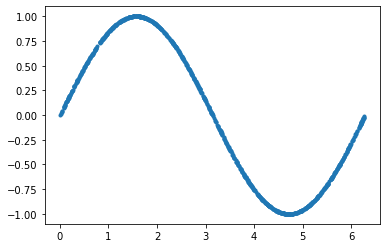

In [ ]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [ ]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [ ]:
train_loader

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [ ]:
discriminator = Discriminator()

In [ ]:
discriminator


Discriminator(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=64, out_features=1, bias=True)
    (10): Sigmoid()
  )
)

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

In [ ]:
generator

Generator(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=2, bias=True)
  )
)

In [ ]:
lr = 0.001
num_epochs = 1000
loss_function = nn.BCELoss()

In [ ]:
discriminator.parameters()

<generator object Module.parameters at 0x7f567c73e650>

In [ ]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [ ]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.08583125472068787
Epoch: 0 Loss G.: 2.44887638092041
Epoch: 10 Loss D.: 0.6285189390182495
Epoch: 10 Loss G.: 0.8876502513885498
Epoch: 20 Loss D.: 0.6182305812835693
Epoch: 20 Loss G.: 0.8648993372917175
Epoch: 30 Loss D.: 0.695717990398407
Epoch: 30 Loss G.: 0.766758382320404
Epoch: 40 Loss D.: 0.5578057765960693
Epoch: 40 Loss G.: 0.7964074611663818
Epoch: 50 Loss D.: 0.7240282893180847
Epoch: 50 Loss G.: 0.7547839283943176
Epoch: 60 Loss D.: 0.7007035613059998
Epoch: 60 Loss G.: 0.6987107992172241
Epoch: 70 Loss D.: 0.6938597559928894
Epoch: 70 Loss G.: 0.7230678796768188
Epoch: 80 Loss D.: 0.7783004641532898
Epoch: 80 Loss G.: 0.8628145456314087
Epoch: 90 Loss D.: 0.687244176864624
Epoch: 90 Loss G.: 0.7471864819526672
Epoch: 100 Loss D.: 0.7102287411689758
Epoch: 100 Loss G.: 0.6902169585227966
Epoch: 110 Loss D.: 0.674498975276947
Epoch: 110 Loss G.: 0.8281515836715698
Epoch: 120 Loss D.: 0.6665085554122925
Epoch: 120 Loss G.: 0.6302003264427185
Epoch: 130 Lo

In [ ]:
latent_space_samples = torch.randn(500, 2)
generated_samples = generator(latent_space_samples)

In [ ]:
generated_samples

tensor([[ 3.8975e+00, -6.8335e-01],
        [ 5.6955e+00, -5.9052e-01],
        [ 6.3371e+00, -1.2983e-01],
        [ 6.7935e-01,  6.3341e-01],
        [ 3.2003e-01,  3.1814e-01],
        [ 6.2891e+00, -1.3541e-01],
        [ 2.4365e+00,  6.4529e-01],
        [ 1.0195e+00,  8.5614e-01],
        [ 4.7278e+00, -1.0057e+00],
        [ 5.2737e+00, -9.0604e-01],
        [ 4.6292e+00, -9.8717e-01],
        [ 4.5817e+00, -9.7741e-01],
        [ 9.1819e-01,  7.8640e-01],
        [ 5.5477e+00, -7.0437e-01],
        [ 4.6413e+00, -9.8993e-01],
        [ 5.0204e+00, -9.5733e-01],
        [ 6.0152e+00, -3.4896e-01],
        [ 1.4709e+00,  9.9486e-01],
        [ 1.3988e+00,  9.9733e-01],
        [ 4.9890e+00, -9.7302e-01],
        [ 5.4022e+00, -8.0663e-01],
        [ 2.8040e+00,  3.4143e-01],
        [ 4.6810e-01,  4.4653e-01],
        [ 3.3193e+00, -1.5477e-01],
        [ 1.8258e+00,  9.6364e-01],
        [ 2.8626e+00,  2.9003e-01],
        [ 5.7519e-01,  5.3798e-01],
        [ 8.4424e-01,  7.447

In [ ]:
generated_samples.detach()

tensor([[ 3.8975e+00, -6.8335e-01],
        [ 5.6955e+00, -5.9052e-01],
        [ 6.3371e+00, -1.2983e-01],
        [ 6.7935e-01,  6.3341e-01],
        [ 3.2003e-01,  3.1814e-01],
        [ 6.2891e+00, -1.3541e-01],
        [ 2.4365e+00,  6.4529e-01],
        [ 1.0195e+00,  8.5614e-01],
        [ 4.7278e+00, -1.0057e+00],
        [ 5.2737e+00, -9.0604e-01],
        [ 4.6292e+00, -9.8717e-01],
        [ 4.5817e+00, -9.7741e-01],
        [ 9.1819e-01,  7.8640e-01],
        [ 5.5477e+00, -7.0437e-01],
        [ 4.6413e+00, -9.8993e-01],
        [ 5.0204e+00, -9.5733e-01],
        [ 6.0152e+00, -3.4896e-01],
        [ 1.4709e+00,  9.9486e-01],
        [ 1.3988e+00,  9.9733e-01],
        [ 4.9890e+00, -9.7302e-01],
        [ 5.4022e+00, -8.0663e-01],
        [ 2.8040e+00,  3.4143e-01],
        [ 4.6810e-01,  4.4653e-01],
        [ 3.3193e+00, -1.5477e-01],
        [ 1.8258e+00,  9.6364e-01],
        [ 2.8626e+00,  2.9003e-01],
        [ 5.7519e-01,  5.3798e-01],
        [ 8.4424e-01,  7.447

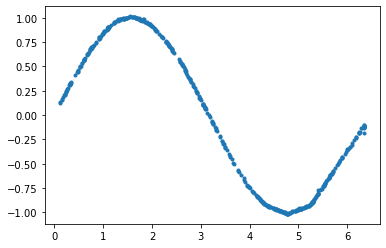

In [ ]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")

In [ ]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

In [ ]:
torch.manual_seed(111)

In [ ]:
device = ""
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

In [ ]:
train_set = torchvision.datasets.MNIST(
    root=".", train=True, download=True, transform=transform
)